## Linear Programming in Python - Solutions to Exercises

In [1]:
import scipy.optimize as spo

In [2]:
# The documentation for scipy.optimize.linprog is here:
# https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.linprog.html

### Exercise 7.1

a) Andy must check each mug and pencil to ensure quality remains high. Checking a piece of merchandise takes only 1 minute, but Andy is very busy and only has 60 minutes to check merchandise each week. Alter the code to include Andy's quality control stage.

b) CASA also makes sweets. Adam takes 2 minutes to make a sweet, Elsa takes 3 minutes to paint the CASA logo on to the packaging, and Andy can check sweets in just 30 seconds. A sweet can be sold for a profit of 8 pence. Alter the code to include sweet making.

In [3]:
# 7.1(a)

# No change to the objective function (profits unchanged)
objective_coeffs_71a  = [-1.3,-0.9]

# Andy has his own constraint:
# x + y ≤ 60
# represented as a new row in the constraint matrix...
constraint_coeffs_71a = [[50,25],
                         [30,35],
                         [ 1, 1]]

# ... and a new value in this vector:
constraint_consts_71a = [2400,2100,60]

# Bounds unchanged:
x_bounds_71a = (0,None)
y_bounds_71a = (0,None)

# Perform linear optimisation:
results = spo.linprog(objective_coeffs_71a, A_ub=constraint_coeffs_71a, b_ub=constraint_consts_71a, bounds=(x_bounds_71a, y_bounds_71a),options={"disp": True})

# Store relevant values:
x, y = results['x']
P = -results['fun']

# Report results:
print()
print("The optimal production schedule is to make", x, "mugs and", y, "pencils.")
print("This will make £" + str(round(P,2)) + " of profit.")

Optimization terminated successfully.
         Current function value: -68.400000  
         Iterations: 2

The optimal production schedule is to make 36.0 mugs and 24.0 pencils.
This will make £68.4 of profit.


In [4]:
# 7.1(b)

# z = number of sweets produced

# Add the profit of a sweet to the objective function:
# P = 1.3x + 0.9y + 0.08z
objective_coeffs_71b  = [-1.3,-0.9,-0.08]

# The time taken for each participant to work on a sweet must be added to the constraints:
# 50x + 25y + 2z ≤ 2400 (Adam)  
# 30x + 35y + 3z ≤ 2100 (Elsa)
# x + y + 0.5z ≤ 60 (Andy)
constraint_coeffs_71b = [[50,25,2  ],
                         [30,35,3  ],
                         [ 1, 1,0.5]]

# No change to this constraint vector though:
constraint_consts_71b = [2400,2100,60]

# Bounds for z the same as for x and y:
x_bounds_71b = (0,None)
y_bounds_71b = (0,None)
z_bounds_71b = (0,None)

# Perform linear optimisation:
results = spo.linprog(objective_coeffs_71b, A_ub=constraint_coeffs_71b, b_ub=constraint_consts_71b, bounds=(x_bounds_71b, y_bounds_71b, z_bounds_71b),options={"disp": True})

# Store relevant values:
x, y, z = results['x']
P = -results['fun']

# Report results:
print()
print("The optimal production schedule is to make", x, "mugs,", y, "pencils and", z, "sweets.")
print("This will make £" + str(round(P,2)) + " of profit.")

Optimization terminated successfully.
         Current function value: -68.400000  
         Iterations: 2

The optimal production schedule is to make 36.0 mugs, 24.0 pencils and 0.0 sweets.
This will make £68.4 of profit.


### Exercise 7.2

(Very, very loosely adapted from http://aetos.it.teithe.gr/~vkostogl/en/files/Educational%20material/SGGW_2016/Linear%20Programming_exercises.pdf)

A cargo ship can store a maximum of 1200 tonnes of goods and has a capacity of 4200 cubic metres. You can transport containers of rum (20 tonnes, 50 cubic metres) and containers of glassware (16 tonnes, 70 cubic metres). Each container of rum sells for a profit of £28000, each container of glassware sells for a profit of £36000.

a) Represent all the information as a linear programming problem.

b) Solve the problem to determine how many containers of rum and how many containers of glassware you should transport to maximise your profit?

#### 7.2(a)

Maximise:  
P = 28000x + 36000y

Subject to:  
20x + 16y ≤ 1200 (mass constraint)  
50x + 70y ≤ 4200 (capacity constraint)  
x ≥ 0  
y ≥ 0

Where:  
x = Number of containers of rum 
y = Number of containers of glassware
P = Profit (£)

In [5]:
# 7.2(b)

objective_coeffs_72b  = [-28000,-36000]

constraint_coeffs_72b = [[20,16],
                         [50,70]]

constraint_consts_72b = [1200,4200]

x_bounds_72b = (0,None)
y_bounds_72b = (0,None)

results = spo.linprog(objective_coeffs_72b, A_ub=constraint_coeffs_72b, b_ub=constraint_consts_72b, bounds=(x_bounds_72b, y_bounds_72b),options={"disp": True})

x, y = results['x']
P = -results['fun']

print()
print("The optimal cargo is ", x, "containers of rum and", y, "containers of glassware.")
print("This will make £" + str(round(P,2)) + " of profit.")

Optimization terminated successfully.
         Current function value: -2224000.000000
         Iterations: 2

The optimal cargo is  28.0 containers of rum and 40.0 containers of glassware.
This will make £2224000.0 of profit.


### Exercise 7.3 (Harder)
(Adapted from http://www.durban.gov.za/documents/city_government/maths_science_technology_programme/mathematics-newsletter.pdf - similar to the example with the farmer.)

A property developer has 80 hectares for building luxury homes and affordable homes. She must allocate at least 10 hectares to luxury homes, while local planning rules oblige her to allocate at least a quarter of developed land to affordable homes. She would prefer to construct more affordable homes than luxury homes, but her investors will only allow her to allocate a maximum of three times the amount of land to affordable homes as to luxury homes.

a) Sketch a graph including all the constraints to determine the feasible region.

The developer can make a profit of £8m per hectare on luxury homes and £5m per hectare on affordable homes.

b) Represent all the information as a linear programming problem.

c) Solve the problem to show how much land the developer should allocate to each type of housing to maximise her profit and find the value of that maximum profit.

#### 7.3

Maximise:  
P = 8000000x + 5000000y

Subject to:  
x + y ≤ 80 (total area constraint)  
x ≥ 10 (min luxury homes)  
0.25x - 0.75y ≤ 0 (local planning rules constraint) [Rearranged from y ≥ 0.25(x + y)]  
-3x + y ≤ 0 (investor demands constraint) [Rearranged from y ≤ 3x]
y ≥ 0 (non-negativity constraint)

Where:  
x = Area of luxury homes (ha)  
y = Area of affordable homes (ha)  
P = Profit (£)

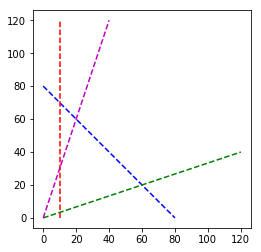

In [6]:
# 7.3(a)

# This is what the sketch should look like:
# (Don't worry about understanding these plotting commands...
# ... you were expected to sketch this by hand.)

import matplotlib.pyplot as plt
%matplotlib inline

# x + y ≤ 80 (blue)
x1vals = [0,80]
y1vals = [80,0]

# x ≥ 10 (red)
x2vals = [10,10]
y2vals = [0,120]

# 0.25x - 0.75y ≤ 0 (green)
x3vals = [0,120]
y3vals = [0,40]

# -3x + y ≤ 0 (magenta)
x4vals = [0,40]
y4vals = [0,120]

plt.figure(1)
plt.gca().set_aspect('equal')
dummy = plt.plot(x1vals,y1vals,'b--',x2vals,y2vals,'r--',x3vals,y3vals,'g--',x4vals,y4vals,'m--')

# Note that, in this plot, the feasible region is the large quadrilateral in the centre.

In [7]:
# 7.3(b)

objective_coeffs_73  = [-8,-5] # Expressed in millions

constraint_coeffs_73 = [[1,1],
                        [0.25,-0.75],
                        [-3,1]]

constraint_consts_73 = [80,0,0]

x_bounds_73 = (10,80)
y_bounds_73 = (0,80)

results = spo.linprog(objective_coeffs_73, A_ub=constraint_coeffs_73, b_ub=constraint_consts_73, bounds=(x_bounds_73, y_bounds_73),options={"disp": True})

x, y = results['x']
P = -results['fun']

print()
print("The optimal land allocation is ", x, "ha of luxury homes and", y, "ha of affordable homes.")
print("This will make £" + str(int(round(P,0))), "million of profit.")

Optimization terminated successfully.
         Current function value: -580.000000 
         Iterations: 3

The optimal land allocation is  60.0 ha of luxury homes and 20.0 ha of affordable homes.
This will make £580 million of profit.
